In [7]:
import pandas as pd

In [8]:
a=pd.read_csv('/content/diamonds.csv')

In [9]:
print(a)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[50000 rows x 10 columns]


In [10]:
a.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
a['cut'].value_counts()

Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: cut, dtype: int64

In [12]:
cut = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
a['cut'] = a['cut'].map(cut)

In [13]:
a['color'].value_counts()

G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: color, dtype: int64

In [14]:
color = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
a['color'] = a['color'].map(color)

In [15]:
a['clarity'].value_counts()

SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: clarity, dtype: int64

In [16]:
clarity = {'I1': 1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8 }
a['clarity'] = a['clarity'].map(clarity)

In [17]:
print(a)

       carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    5      6        2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    4      6        3   59.8   61.0    326  3.89  3.84  2.31
2       0.23    2      6        5   56.9   65.0    327  4.05  4.07  2.31
3       0.29    4      2        4   62.4   58.0    334  4.20  4.23  2.63
4       0.31    2      1        2   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
49995   0.72    5      7        3   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72    2      7        3   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70    3      7        3   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    4      3        2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75    5      7        2   62.2   55.0   2757  5.83  5.87  3.64

[50000 rows x 10 columns]


LINEAR REGRESSION
Root Mean Squared Error: 1186.4845496566309
Root Mean Absolute Error: 28.041482290571405


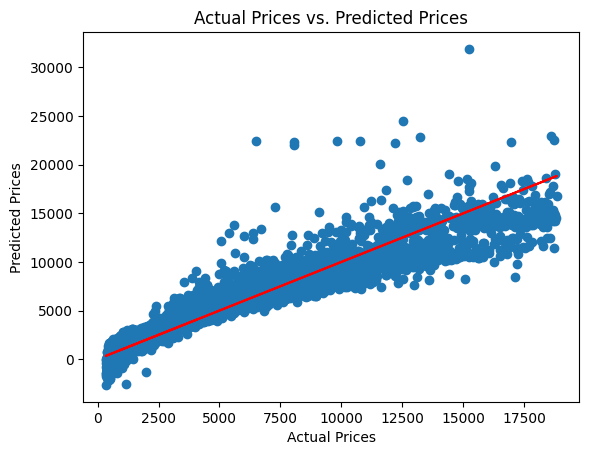

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = a.drop('price', axis=1)
y = a['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the prices on the test set
predictions = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
mse = np.sqrt(mean_squared_error(y_test, predictions))
mae = np.sqrt(mean_absolute_error(y_test, predictions))
print("LINEAR REGRESSION")
print("Root Mean Squared Error:", mse)
print("Root Mean Absolute Error:", mae)

import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')

# Draw a line for perfect correlation. The plot is for regression, so we use a line to show the perfect fit.
plt.plot(y_test, y_test, color='red')

plt.show()




Support Vector Machine(SVM):
Mean Squared Error (MSE): 2967049.1538787787
Mean Absolute Error (MAE): 990.2357785278473


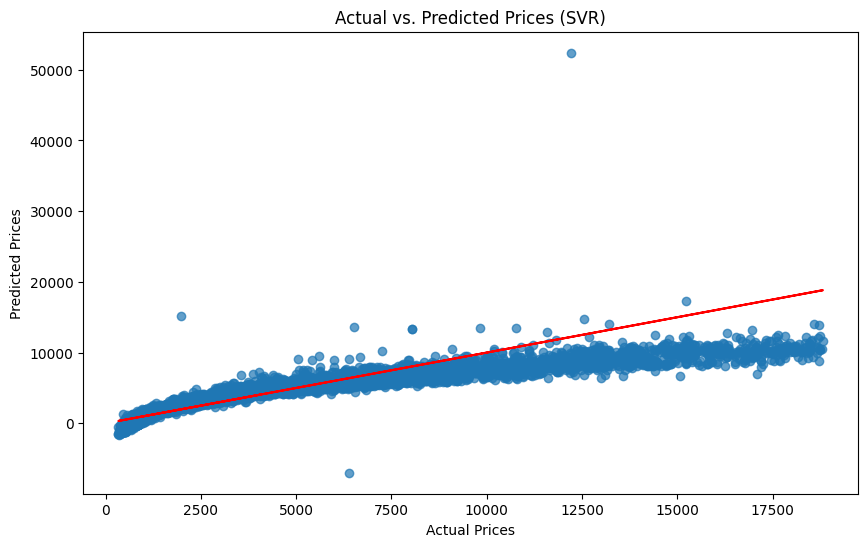

In [19]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Initialize Support Vector Machine for Regression (SVR) model
svr_reg = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter

# Fit the model to the training data
svr_reg.fit(X_train, y_train)

# Make predictions on the test set
svr_y_pred = svr_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)

print("\nSupport Vector Machine(SVM):")
print(f"Mean Squared Error (MSE): {svr_mse}")
print(f"Mean Absolute Error (MAE): {svr_mae}")

# Create a scatter plot to visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_y_pred, alpha=0.7)
plt.plot(y_test, y_test, color='red')  # Line for perfect fit
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (SVR)')
plt.show()



RIDGE REGRESSION
Root Mean Squared Error: 1186.4697175595509
Root Mean Absolute Error: 28.048382878778654


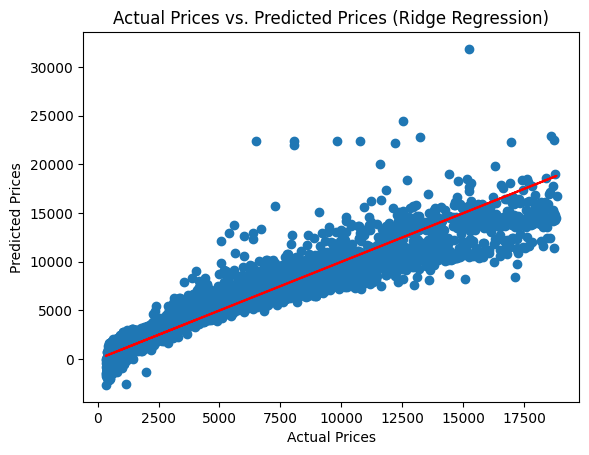

In [20]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict the prices on the test set
ridge_predictions = ridge_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) and Root Mean Absolute Error (MAE) for Ridge Regression
ridge_mse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_mae = np.sqrt(mean_absolute_error(y_test, ridge_predictions))

print("\nRIDGE REGRESSION")
print("Root Mean Squared Error:", ridge_mse)
print("Root Mean Absolute Error:", ridge_mae)

# Create a scatter plot of actual vs. predicted values for Ridge Regression
plt.scatter(y_test, ridge_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Ridge Regression)')

# Draw a line for perfect correlation
plt.plot(y_test, y_test, color='red')

plt.show()



LASSO REGRESSION
Root Mean Squared Error: 1183.397537790539
Root Mean Absolute Error: 28.06578924273558


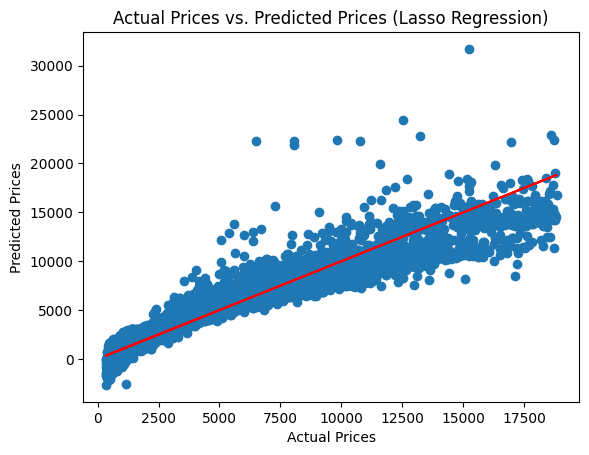

In [21]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict the prices on the test set
lasso_predictions = lasso_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) and Root Mean Absolute Error (MAE) for Lasso Regression
lasso_mse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_mae = np.sqrt(mean_absolute_error(y_test, lasso_predictions))

print("\nLASSO REGRESSION")
print("Root Mean Squared Error:", lasso_mse)
print("Root Mean Absolute Error:", lasso_mae)

# Create a scatter plot of actual vs. predicted values for Lasso Regression
plt.scatter(y_test, lasso_predictions)
plt.xlabel('Actual Prices')
plt.ylabel ('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Lasso Regression)')

# Draw a line for perfect correlation
plt.plot(y_test, y_test, color='red')

plt.show()



KNN REGRESSION
Root Mean Squared Error: 847.2932739093354
Root Mean Absolute Error: 21.433676772779794


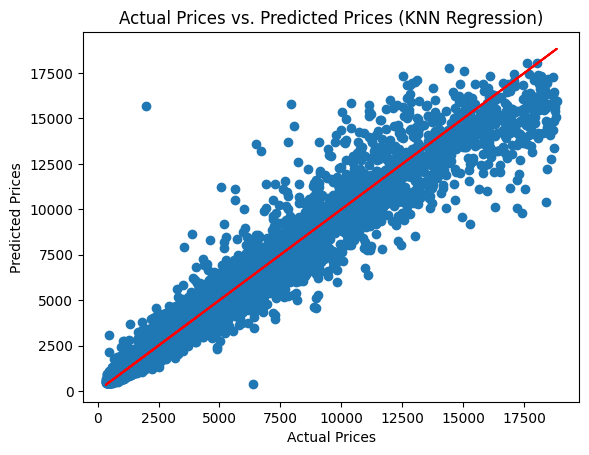

In [22]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Predict the prices on the test set
knn_predictions = knn_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) and Root Mean Absolute Error (MAE) for KNN Regression
knn_mse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_mae = np.sqrt(mean_absolute_error(y_test, knn_predictions))

print("\nKNN REGRESSION")
print("Root Mean Squared Error:", knn_mse)
print("Root Mean Absolute Error:", knn_mae)

# Create a scatter plot of actual vs. predicted values for KNN Regression
plt.scatter(y_test, knn_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (KNN Regression)')

# Draw a line for perfect correlation
plt.plot(y_test, y_test, color='red')

plt.show()


In [24]:
# Import the necessary library for bootstrapping
from sklearn.utils import resample

# Define the number of bootstrap samples
n_bootstrap_samples = 1000

# Initialize arrays to store MSE and MAE results for bootstrapped samples
mse_bootstrapped = []
mae_bootstrapped = []

for _ in range(n_bootstrap_samples):
    # Resample the training data with replacement
    X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=42)

    # Fit your chosen model (e.g., linear regression, ridge, lasso, or KNN) to the bootstrapped data
    # Make predictions and calculate MSE and MAE
    # Replace 'your_model' with the appropriate model (lin_reg, ridge_reg, lasso_reg, knn_reg)
    model.fit(X_bootstrap, y_bootstrap)
    y_pred_bootstrap = model.predict(X_test)
    mse_bootstrap = mean_squared_error(y_test, y_pred_bootstrap)
    mae_bootstrap = mean_absolute_error(y_test, y_pred_bootstrap)

    mse_bootstrapped.append(mse_bootstrap)
    mae_bootstrapped.append(mae_bootstrap)

# Calculate the mean and standard deviation of bootstrapped MSE and MAE
mean_mse_bootstrap = np.mean(mse_bootstrapped)
std_mse_bootstrap = np.std(mse_bootstrapped)
mean_mae_bootstrap = np.mean(mae_bootstrapped)
std_mae_bootstrap = np.std(mae_bootstrapped)

print("\nBootstrapping Results(Lin_reg):")
print(f"Mean Bootstrapped MSE: {mean_mse_bootstrap}")
print(f"Standard Deviation of Bootstrapped MSE: {std_mse_bootstrap}")
print(f"Mean Bootstrapped MAE: {mean_mae_bootstrap}")
print(f"Standard Deviation of Bootstrapped MAE: {std_mae_bootstrap}")

'''for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(X, y, random_state=42)

    # Initialize and train an SVR model
    svr = SVR(kernel='linear', C=1.0)
    svr.fit(X_bootstrap, y_bootstrap)

    # Make predictions on your test set or validation set
    y_pred = svr.predict(X_test)  # Replace X_test with your test data

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)  # Replace y_test with your test labels
    mse_bootstrapped.append(mse)

# Calculate the mean and standard deviation of bootstrapped MSE and MAE
mean_mse_bootstrap = np.mean(mse_bootstrapped)
std_mse_bootstrap = np.std(mse_bootstrapped)
mean_mae_bootstrap = np.mean(mae_bootstrapped)
std_mae_bootstrap = np.std(mae_bootstrapped)

print("\nBootstrapping Results(SVR):")
print(f"Mean Bootstrapped MSE: {mean_mse_bootstrap}")
print(f"Standard Deviation of Bootstrapped MSE: {std_mse_bootstrap}")
print(f"Mean Bootstrapped MAE: {mean_mae_bootstrap}")
print(f"Standard Deviation of Bootstrapped MAE: {std_mae_bootstrap}")'''

for _ in range(n_bootstrap_samples):
    # Resample the training data with replacement
    X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=42)

    # Fit your chosen model (e.g., linear regression, ridge, lasso, or KNN) to the bootstrapped data
    # Make predictions and calculate MSE and MAE
    # Replace 'your_model' with the appropriate model (lin_reg, ridge_reg, lasso_reg, knn_reg)
    ridge_model.fit(X_train, y_train)
    ridge_model.fit(X_bootstrap, y_bootstrap)
    y_pred_bootstrap = ridge_model.predict(X_test)
    mse_bootstrap = mean_squared_error(y_test, y_pred_bootstrap)
    mae_bootstrap = mean_absolute_error(y_test, y_pred_bootstrap)

    mse_bootstrapped.append(mse_bootstrap)
    mae_bootstrapped.append(mae_bootstrap)

# Calculate the mean and standard deviation of bootstrapped MSE and MAE
mean_mse_bootstrap = np.mean(mse_bootstrapped)
std_mse_bootstrap = np.std(mse_bootstrapped)
mean_mae_bootstrap = np.mean(mae_bootstrapped)
std_mae_bootstrap = np.std(mae_bootstrapped)

print("\nBootstrapping Results(Ridge):")
print(f"Mean Bootstrapped MSE: {mean_mse_bootstrap}")
print(f"Standard Deviation of Bootstrapped MSE: {std_mse_bootstrap}")
print(f"Mean Bootstrapped MAE: {mean_mae_bootstrap}")
print(f"Standard Deviation of Bootstrapped MAE: {std_mae_bootstrap}")

for _ in range(n_bootstrap_samples):
    # Resample the training data with replacement
    X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=42)

    # Fit your chosen model (e.g., linear regression, ridge, lasso, or KNN) to the bootstrapped data
    # Make predictions and calculate MSE and MAE
    # Replace 'your_model' with the appropriate model (lin_reg, ridge_reg, lasso_reg, knn_reg)
    lasso_model.fit(X_bootstrap, y_bootstrap)
    y_pred_bootstrap = lasso_model.predict(X_test)
    mse_bootstrap = mean_squared_error(y_test, y_pred_bootstrap)
    mae_bootstrap = mean_absolute_error(y_test, y_pred_bootstrap)

    mse_bootstrapped.append(mse_bootstrap)
    mae_bootstrapped.append(mae_bootstrap)

# Calculate the mean and standard deviation of bootstrapped MSE and MAE
mean_mse_bootstrap = np.mean(mse_bootstrapped)
std_mse_bootstrap = np.std(mse_bootstrapped)
mean_mae_bootstrap = np.mean(mae_bootstrapped)
std_mae_bootstrap = np.std(mae_bootstrapped)

print("\nBootstrapping Results(Lasso):")
print(f"Mean Bootstrapped MSE: {mean_mse_bootstrap}")
print(f"Standard Deviation of Bootstrapped MSE: {std_mse_bootstrap}")
print(f"Mean Bootstrapped MAE: {mean_mae_bootstrap}")
print(f"Standard Deviation of Bootstrapped MAE: {std_mae_bootstrap}")

for _ in range(n_bootstrap_samples):
    # Resample the training data with replacement
    X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=42)

    # Fit your chosen model (e.g., linear regression, ridge, lasso, or KNN) to the bootstrapped data
    # Make predictions and calculate MSE and MAE
    # Replace 'your_model' with the appropriate model (lin_reg, ridge_reg, lasso_reg, knn_reg)
    knn_model.fit(X_bootstrap, y_bootstrap)
    y_pred_bootstrap = knn_model.predict(X_test)
    mse_bootstrap = mean_squared_error(y_test, y_pred_bootstrap)
    mae_bootstrap = mean_absolute_error(y_test, y_pred_bootstrap)

    mse_bootstrapped.append(mse_bootstrap)
    mae_bootstrapped.append(mae_bootstrap)

# Calculate the mean and standard deviation of bootstrapped MSE and MAE
mean_mse_bootstrap = np.mean(mse_bootstrapped)
std_mse_bootstrap = np.std(mse_bootstrapped)
mean_mae_bootstrap = np.mean(mae_bootstrapped)
std_mae_bootstrap = np.std(mae_bootstrapped)

print("\nBootstrapping Results(KNN):")
print(f"Mean Bootstrapped MSE: {mean_mse_bootstrap}")
print(f"Standard Deviation of Bootstrapped MSE: {std_mse_bootstrap}")
print(f"Mean Bootstrapped MAE: {mean_mae_bootstrap}")
print(f"Standard Deviation of Bootstrapped MAE: {std_mae_bootstrap}")


Bootstrapping Results(Lin_reg):
Mean Bootstrapped MSE: 1578215.0229307036
Standard Deviation of Bootstrapped MSE: 4.656612873077393e-10
Mean Bootstrapped MAE: 785.7480812910266
Standard Deviation of Bootstrapped MAE: 1.1368683772161603e-13

Bootstrapping Results(Ridge):
Mean Bootstrapped MSE: 1575839.1208887314
Standard Deviation of Bootstrapped MSE: 2375.9020419721496
Mean Bootstrapped MAE: 785.9076122699151
Standard Deviation of Bootstrapped MAE: 0.15953097888871068


KeyboardInterrupt: ignored